In [1]:
# https://www.reddit.com/r/financialindependence/comments/9w8h2j/the_4_rule_is_there_some_builtin_flexibility/

In [2]:
%matplotlib inline
from pprint import pprint

from plot import plot_two
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting, N_100_RebalanceHarvesting
import harvesting

import itertools
from decimal import Decimal
from montecarlo import conservative

In [3]:
from matplotlib import pyplot as plt
import matplotlib
import plot

In [4]:
import math
from market import Returns_US_1871
import withdrawal

In [45]:
class EAH(withdrawal.WithdrawalStrategy):
    def __init__(self, portfolio, harvest):
        super().__init__(portfolio, harvest)
        self.last_withdrawal = Decimal('.04') * portfolio.value
        self.portfolio_highwater = portfolio.value
        
    def start(self):
        withdraw = self.last_withdrawal
        return withdraw
    
    def next(self):
        self.portfolio_highwater *= (1 + self.current_inflation)
        if self.portfolio.value > self.portfolio_highwater:
            withdraw = Decimal('.04') * self.portfolio.value
            self.portfolio_highwater = self.portfolio.value
        else:
            withdraw = self.last_withdrawal * (1 + self.current_inflation)
        self.last_withdrawal = withdraw
        return withdraw

/Users/justus/anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


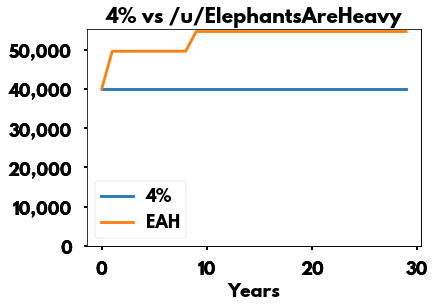

In [46]:
def compare(series, years=30):
    (r1, r2) = itertools.tee(series)
    portfolio = (600000, 400000)
    x = simulate_withdrawals(r1, years=years, harvesting=N_60_RebalanceHarvesting, withdraw=withdrawal.ConstantDollar, portfolio=portfolio)
    y = simulate_withdrawals(r2, years=years, harvesting=N_60_RebalanceHarvesting, withdraw=EAH, portfolio=portfolio)

    s1 = [n.withdraw_r for n in x]
    s2 = [n.withdraw_r for n in y]

    plot.plot_n({'4%': s1, 'EAH': s2}, 'Years', '4% vs /u/ElephantsAreHeavy')

compare(Returns_US_1871().iter_from(1928))

In [47]:
c_cd = 0
c_eah = 0
count = 0

for year in range(1871, 2017-30):
    series = Returns_US_1871().iter_from(year)
    (r1, r2) = itertools.tee(series)
    portfolio = (600000, 400000)
    x = simulate_withdrawals(r1, years=30, harvesting=N_60_RebalanceHarvesting, withdraw=withdrawal.ConstantDollar, portfolio=portfolio)
    y = simulate_withdrawals(r2, years=30, harvesting=N_60_RebalanceHarvesting, withdraw=EAH, portfolio=portfolio)

    cd = x[-1].portfolio_n
    eah = y[-1].portfolio_n
    
    count += 1
    if cd > 0:
        c_cd += 1
    if eah > 0:
        c_eah += 1
    
print(c_cd/count)
print(c_eah/count)
print(count, c_cd, c_eah)

0.9655172413793104
0.9396551724137931
116 112 109
